# Homework 2 - Wine Quality Dataset

Dataset: White Wine Quality

The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).

In this case, since the quality is an int64 and not a float64. I will be predicting alcohol instead of quality for better visuals.

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3a Loading the dataset with pandas
data = pd.read_csv('winequality-white.csv',sep=';')

In [24]:
# Section 1.3b - Display first 5 rows
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
# Section 1.4 - Display the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [26]:
# Section 1.5 - Building a new data evaluation table
data_points = [
    {'fixed acidity': 7.1, 'volatile acidity': 0.23, 'citric acid': 0.36},
    {'fixed acidity': 6.1, 'volatile acidity': 0.30, 'citric acid': 0.34},
    {'fixed acidity': 8.1, 'volatile acidity': 0.33, 'citric acid': 0.40},
    {'fixed acidity': 5.1, 'volatile acidity': 0.22, 'citric acid': 0.32},
    {'fixed acidity': 6.2, 'volatile acidity': 0.24, 'citric acid': 0.33}
]
data_points

[{'fixed acidity': 7.1, 'volatile acidity': 0.23, 'citric acid': 0.36},
 {'fixed acidity': 6.1, 'volatile acidity': 0.3, 'citric acid': 0.34},
 {'fixed acidity': 8.1, 'volatile acidity': 0.33, 'citric acid': 0.4},
 {'fixed acidity': 5.1, 'volatile acidity': 0.22, 'citric acid': 0.32},
 {'fixed acidity': 6.2, 'volatile acidity': 0.24, 'citric acid': 0.33}]

In [27]:
# Section 2 - Simple Linear Regresion
# 2.1 Select a numerical column as your target (Y).
# 2.2 Choose one predictor (X).
X = data['fixed acidity']
y = data['alcohol']

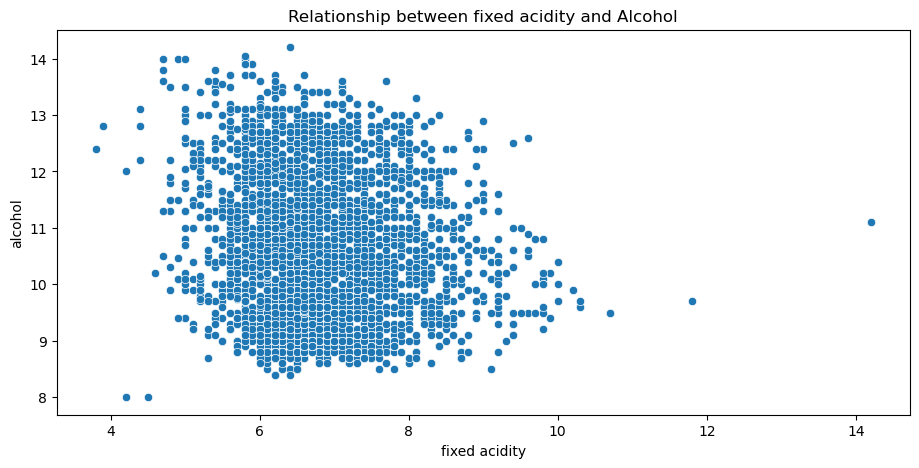

In [28]:
# 2.3 Visualize the relationship with a scatter plot.

# Plotting the data
plt.figure(figsize=(11,5))
sns.scatterplot(x='fixed acidity', y='alcohol', data=data)
plt.title('Relationship between fixed acidity and Alcohol')
plt.show()

In [29]:
# 2.4 # Fiting a Linear Model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Printing a summary
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     72.60
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.09e-17
Time:                        19:20:50   Log-Likelihood:                -7929.8
No. Observations:                4898   AIC:                         1.586e+04
Df Residuals:                    4896   BIC:                         1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7226      0.143     82.041      0.000      11.443      12.003
fixed acidity    -0.1763      0.021     -8.521      0.000      -0.217      -0.136
==============================================================================
Omnibus:                      472.847   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.918
Skew:                           0.449   Prob(JB):                     2.72e-61
Kurtosis:                       2.252   Cond. No.                         57.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Section 2.5 - The R^2 value of 0.015 indicates a relatively weak model fit. The R-squared of 0.0015 means only 1.5% of the variance in pH is explained in the model. So it's quite likely that there are more important factors influencing alchol.

The coefficient on Fixed acidity is -0.1763 which means that for every 1 unit increase in F. acidity, we expect 0.1763 decrease in pH on average. Overall, this appears to be a fairly weak regression model for explaining pH based on the single predictor Fixed Acidity. More data is needed in this case.


In [41]:
# 2.6 - Equation of the model
# alcohol = 11.7226 + -0.1763 x fixed acidity

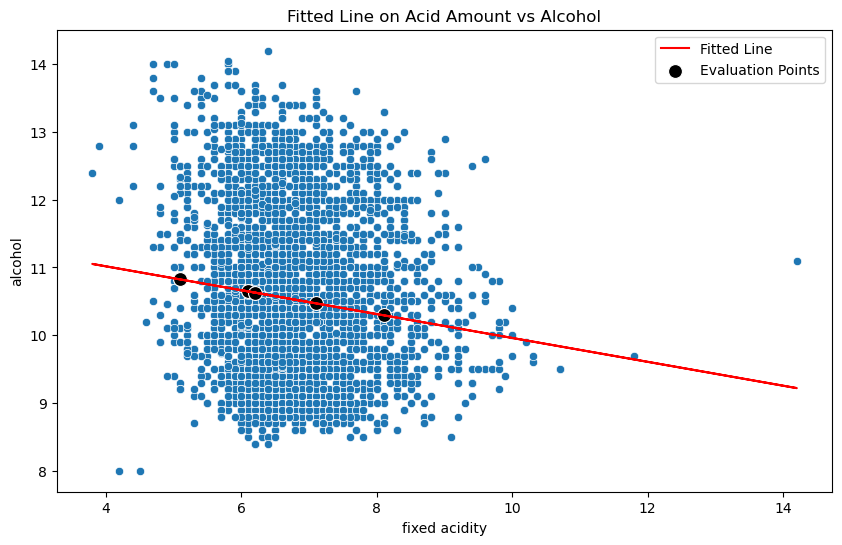

In [30]:
# 2.7 Predict the target value for the evaluation set and overlay these on the scatter plot with a different color 
#or marker.
# 2.8 Add the regression line to the scatter plot.

# Ploting the regresion line and evaluation points

# Get a list of the evaluation points for acidstat
fixed_values = []
for point in data_points:
    fixed_values.append(point['fixed acidity'])

# Least squares coefficients
beta_1 = model.params['fixed acidity']
beta_0 = model.params['const']    
    
# Extracting body_mass values using the regression equation for these flipper values
alcohol_values = beta_0 + beta_1 * np.array(fixed_values)

# Original plot with scatter points and regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['fixed acidity'], y=data['alcohol'])
plt.plot(data['fixed acidity'], beta_0 + beta_1 * data['fixed acidity'], color='red', label="Fitted Line")

# Adding the points from the dictionary with a different color and size
sns.scatterplot(x=fixed_values, y=alcohol_values, color='black', s=100, label="Evaluation Points")

# Title and legend
plt.title('Fitted Line on Acid Amount vs Alcohol')
plt.legend()

plt.show()


array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='alcohol', ylabel='volatile acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='citric acid'>,
        <Axes: xlabel='volatile acidity', ylabel='citric acid'>,
        <Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='residual sugar', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>],
       [<Axes: xlabel='fixed acidity', ylabe

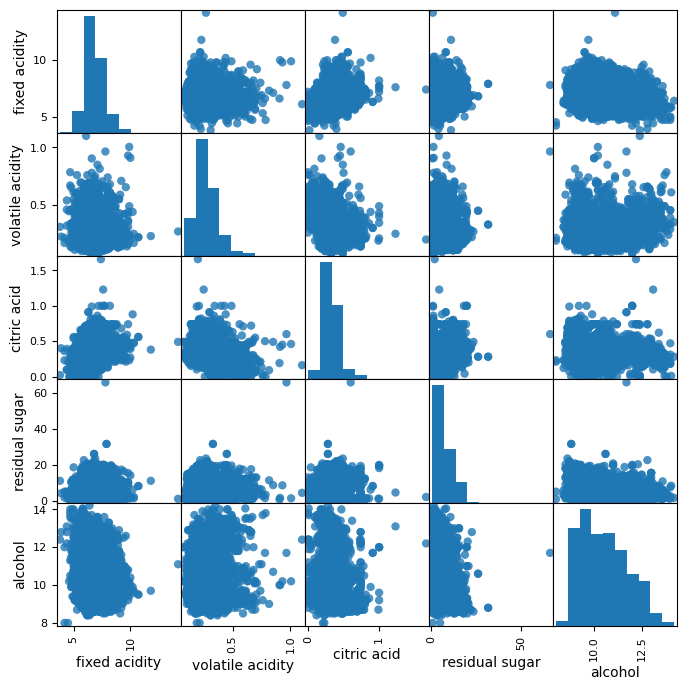

In [31]:
# Section 3
#3.1 Choose 4 or 5 predictors and create a subset of your dataset.
selected_predictors = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','alcohol']

#3.2 Visualize the relationships using a scatter plot matrix.
X = data[selected_predictors]
pd.plotting.scatter_matrix(X, figsize=(8, 8), alpha=0.8, marker='o', diagonal='hist')

In [32]:
#3.3 Based on visual inspection, note any predictors that appear to be correlated.

# Based on the visual, it's quite difficult to accurately say which of these predictors might be the strongest correlation in alcohol. 
# As many different predictors can have an alternate effect on another. In my view, the residual sugar may have a better predictor on the alcohol levels
# As the residual sugar content decreases, the alcohol levels slightly increase.


#3.4 Calculate the VIF (Variance Inflation Factor) for these predictors. (check class examples).
# VIF (Variance Inflation Factor) 
for i in range(X.shape[1]):
    vif = inf.variance_inflation_factor(X.values, i) # Compute VIF 
    print(f"VIF for {X.columns[i]}: \t{vif:10.3f}")

VIF for fixed acidity: 	    46.451
VIF for volatile acidity: 	     8.816
VIF for citric acid: 	     9.663
VIF for residual sugar: 	     2.865
VIF for alcohol: 	    37.816


3.5 Discuss which predictors show high multicollinearity based on the VIF values. 

Based on the VIF (Variance Inflation Factor) values provided, the predictors that show high multicollinearity are:

Fixed acidity (VIF = 46.451)
Alcohol (VIF = 37.816)
Generally, a VIF value greater than 5 or 10 indicates high correlation between predictors and suggests the presence of multicollinearity.

The VIF values for fixed acidity and alcohol are well above 10, over 30 in fact. This implies these two predictors are highly collinear - they are explaining much of the same variability in the response. When two predictors are highly correlated, it can skew the regression results and coefficients.

In contrast, the other predictors have VIF values below 10:

Volatile acidity (VIF = 8.816)
Citric acid (VIF = 9.663)
Residual sugar (VIF = 2.865)
These would not be considered to have high multicollinearity based on the commonly used VIF thresholds.

In [33]:
# Section 4 - Multiple Regresion Model
# 4.1 Choose at least additional 3 predictors which seem relevant to the target.
X = pd.DataFrame(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide']])
y = data['alcohol']

# 4.2 Fit a linear model with the new predictors using statsmodels.api.
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 4.3 Print the model summary and analyze it. Compare the R^2 value with the simple linear regression.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     450.7
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:21:11   Log-Likelihood:                -6746.7
No. Observations:                4898   AIC:                         1.351e+04
Df Residuals:                    4890   BIC:                         1.356e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.7844      0.127    100.276      0.000      12.534      13.034
fixed acidity           -0.0954      0.017     -5.536      0.000      -0.129      -0.062
volatile acidity         1.8869      0.142     13.320      0.000       1.609       2.165
citric acid              0.6321      0.121      5.206      0.000       0.394       0.870
residual sugar          -0.0798      0.003    -26.847      0.000      -0.086      -0.074
chlorides              -16.4007      0.645    -25.408      0.000     -17.666     -15.135
free sulfur dioxide      0.0061      0.001      5.780      0.000       0.004       0.008
total sulfur dioxide    -0.0094      0.000    -21.291      0.000      -0.010      -0.009
==============================================================================
Omnibus:                      107.654   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.840
Skew:                           0.346   Prob(JB):                     4.25e-26
Kurtosis:                       3.305   Cond. No.                     7.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# 4.4 Use the coefficients to write the equation for the model.
# alcohol = 12.7844 + -0.0954 x fixed acidity + 1.8869 x volatile acidity + 0.6321 x citric acid + -0.0798 x residual sugar 
#  .....+ -16.4007 x chlorides + 0.0061 x free sulfur dioxide + -0.0094 x total sulfur dioxide

# 4.5 Predict the target values for the evaluation set based on this new model
# Get lists of the evaluation points for all predictors
fixed_values = []
volatile_values = []
citric_values = []



for point in data_points:
    fixed_values.append(point['fixed acidity'])
    volatile_values.append(point['volatile acidity'])
    citric_values.append(point['citric acid'])


# Extracting coefficients from the model
beta_0 = model.params['const']
beta_1 = model.params['fixed acidity']
beta_2 = model.params['volatile acidity']
beta_3 = model.params['citric acid']


# Calculating values using the multiple regression equation
mutli_values = (beta_0 + 
               beta_1 * np.array(fixed_values) + 
               beta_2 * np.array(volatile_values) + 
               beta_3 * np.array(citric_values))


# Printing the medv values along with the predictor values
for i, (fixed, volatile, citric, multi) in enumerate(zip(fixed_values, volatile_values, citric_values, mutli_values)):
    print(f"Data Point {i+1} - fixed acidity: {fixed:.2f}, volatile acidity: {volatile:.2f}, citric acid: {citric:.2f}, Estimated multi_value: {multi:.2f}")

Data Point 1 - fixed acidity: 7.10, volatile acidity: 0.23, citric acid: 0.36, Estimated multi_value: 12.77
Data Point 2 - fixed acidity: 6.10, volatile acidity: 0.30, citric acid: 0.34, Estimated multi_value: 12.98
Data Point 3 - fixed acidity: 8.10, volatile acidity: 0.33, citric acid: 0.40, Estimated multi_value: 12.89
Data Point 4 - fixed acidity: 5.10, volatile acidity: 0.22, citric acid: 0.32, Estimated multi_value: 12.92
Data Point 5 - fixed acidity: 6.20, volatile acidity: 0.24, citric acid: 0.33, Estimated multi_value: 12.85
